## PREDIKSI PENJUALAN

Penjualan triwulan dari suatu perusahaan selama periode 1981–2005. AdBudget adalah anggaran iklan dan PDB adalah produk domestik bruto dimana seluruhnya telah disesuaikan dengan inflasi. Selanjutnya akan dilakukan prediksi data penjualan hingga tahun 2019.

In [222]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi': 120})

### Input Data

In [238]:
timeseries=pd.read_excel('exercise1.xlsx')
timeseries.head()

,Sales,AdBudget,GDP
1981-03-01,1020.2,659.2,251.8
1981-06-01,889.2,589.0,290.9
1981-09-01,795.0,512.5,290.8
1981-12-01,1003.9,614.1,292.4
1982-03-01,1057.7,647.2,279.1


In [239]:
timeseries.shape

(100, 3)

### Informasi Data

In [207]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1981-03-01 to 2005-12-01
Data columns (total 3 columns):
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3)
memory usage: 3.1 KB


In [208]:
ts1=timeseries.drop(['AdBudget','GDP'],axis=1)
ts1.head()

,Sales
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


### Time Series Data Penjualan

Data penjualan mulai interval waktu 1981-2005.

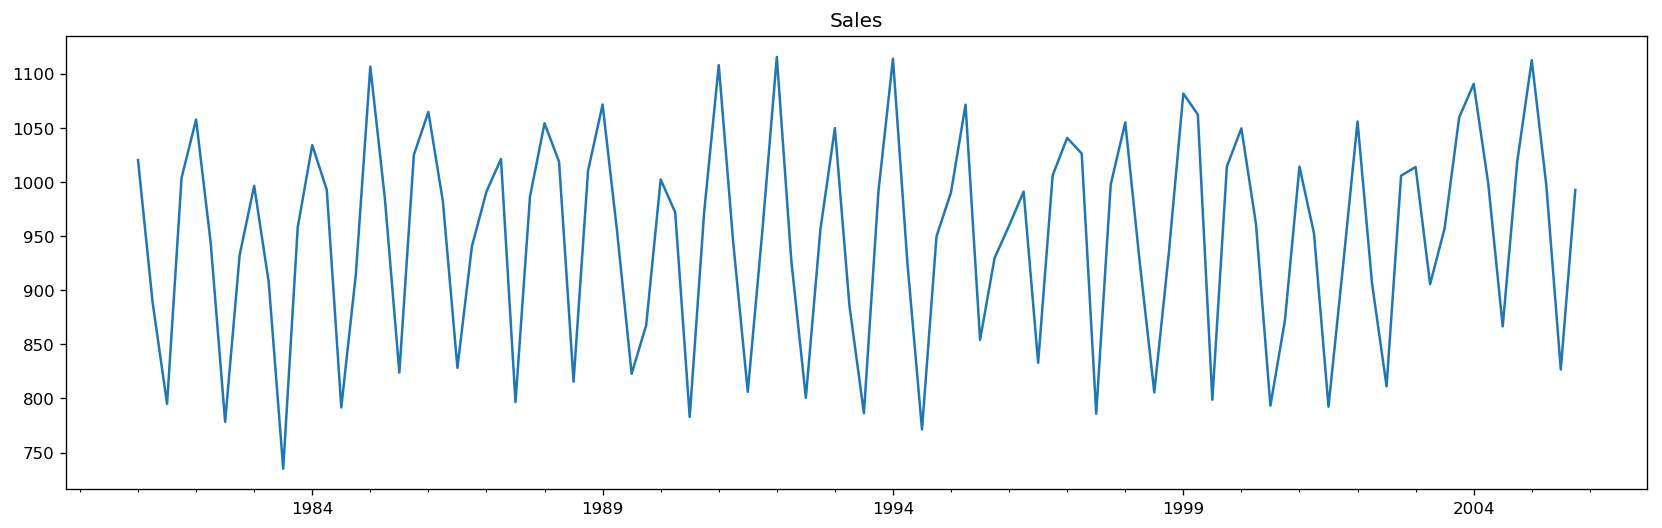

In [214]:
ts1.Sales.plot(title='Sales')
plt.show()

### Uji Stasioner

In [108]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
#Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


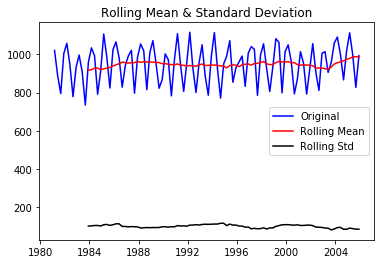

Results of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [110]:
test_stationarity(ts1['Sales'])

Secara visual dapat dilihat bahwa **data telah stasioner dalam rerata** karena garis rolling mean berada diantara data. Sedangkan rolling std juga tidak berada diantara data sehingga **data stasioner dalam ragam**.



**Hipotesis :** <br>
H0 : Data tidak stasioner <br>
H1 : Data Stasioner <br>

**Keputusan :** <br>
p-value = 0,017 <br>
p-value kurang dari 0,05 sehingga tolak H0 <br>

**Kesimpulan :**
Data telah stasioner 

### Plot ACF dan PACF

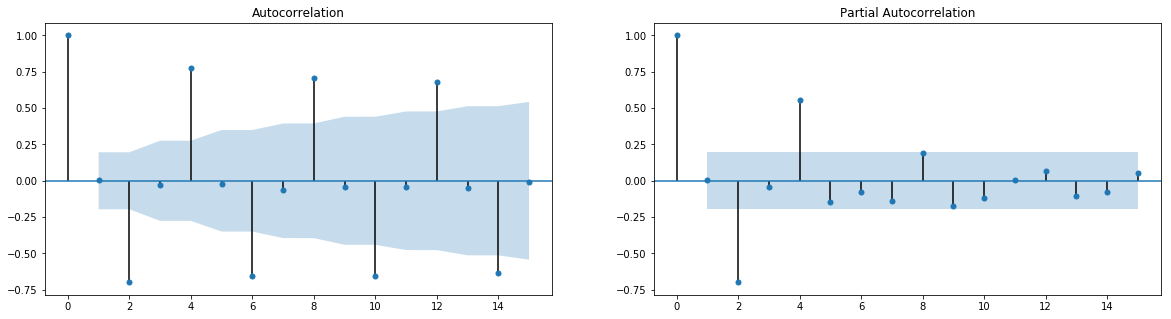

In [130]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pyplot.figure(figsize=(20,5))
pyplot.subplot(121)
plot_acf(ts1['Sales'],ax=pyplot.gca(),lags=15)
pyplot.subplot(122)
plot_pacf(ts1['Sales'],ax=pyplot.gca(),lags=15)
pyplot.show()

** MODEL ARIMA = (4,0,0)**

Plot ACF menunjukkan bahwa terdapat pola seasonal dalam dua periode (enam bulan) pada data penjualan. Data ACF tails off dan turun perlahan. Sedangkan untuk plot PACF diketahui bahwa data cut off setelah lag ke 4 sehingga **model yang digunakan adalah ARIMA** dengan parameter AR adalah 4. <br>


### ARIMA (4,0,0)

In [172]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts1, order=(4,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  100
Model:                     ARMA(4, 0)   Log Likelihood                -543.024
Method:                       css-mle   S.D. of innovations             54.311
Date:                Thu, 05 Sep 2019   AIC                           1098.048
Time:                        14:50:59   BIC                           1113.679
Sample:                    03-01-1981   HQIC                          1104.374
                         - 12-01-2005                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         949.4899      7.980    118.978      0.000     933.849     965.131
ar.L1.Sales     0.0164      0.078      0.208      0.835      -0.137       0.170
ar.L2.Sales    -0.2741      0.076     -3.584    

In [219]:
fc, se, conf = model_fit.forecast(15, alpha=0.05)

### Plot Prediksi dengan Data Aktual

Plotting AR model


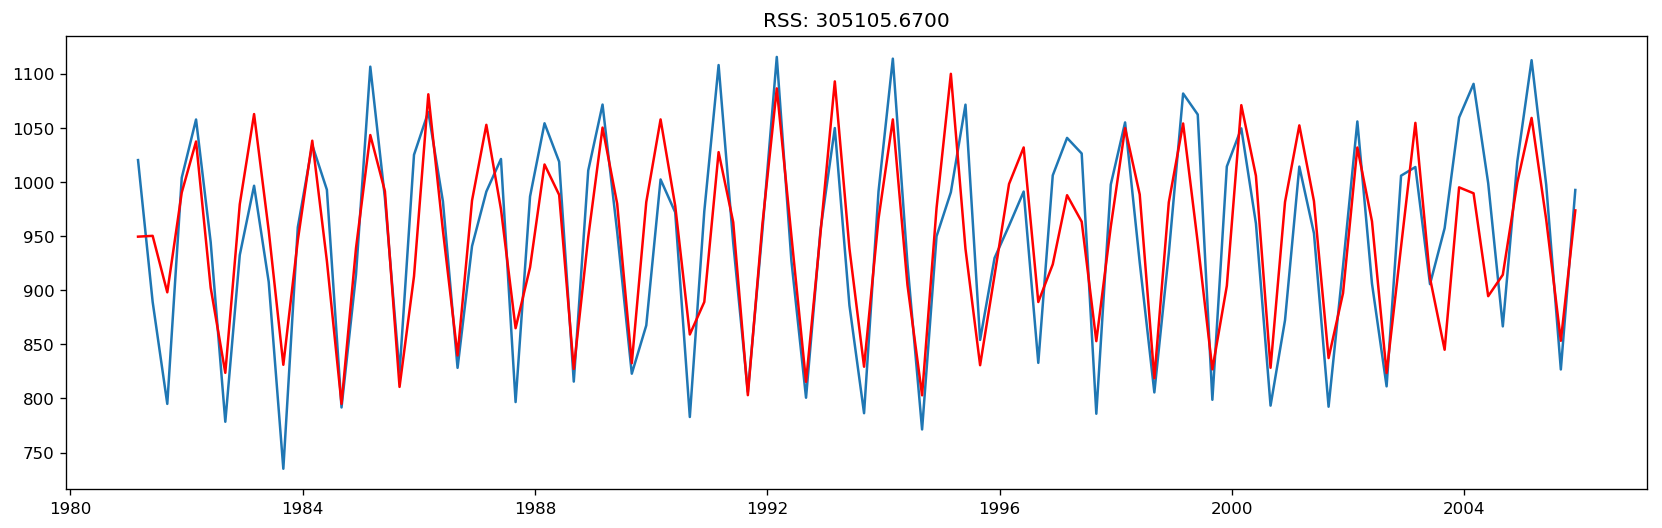

In [220]:
plt.plot(ts1)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit.fittedvalues-ts1['Sales'])**2))
print('Plotting AR model')

Secara visual dapat diketahui bahwa hasil plot antara data prediksi dengan data aktual memiliki pola yang serupa.

### Evaluasi Hasil Prediksi

Untuk mengetahui akurasi dari hasil prediksi maka menggunakan beberapa alat pengukuran :
* MAPE
* MAE
* RMSE
* MSE
* ME

In [226]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax        
    return({'MAPE':mape, 
            'ME'  :me, 
            'MAE' :mae, 
            'MPE' :mpe, 
            'RMSE':rmse, 
            'CORR':corr, 
            'MINMAX':minmax})

In [227]:
forecast_accuracy(model_fit.predict(),ts1['Sales'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


{'CORR': 0.8251388939764943,
 'MAE': 45.318408648576316,
 'MAPE': 0.04785676998500506,
 'ME': -0.5736970942665756,
 'MINMAX': 0.046197744520158346,
 'MPE': 0.0029926955865763345,
 'RMSE': 55.236371173184985}

In [176]:
hasil=model_fit.fittedvalues
hasil.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


1981-03-01     949.489856
1981-06-01     950.225965
1981-09-01     898.070006
1981-12-01     990.241296
1982-03-01    1037.377835
dtype: float64

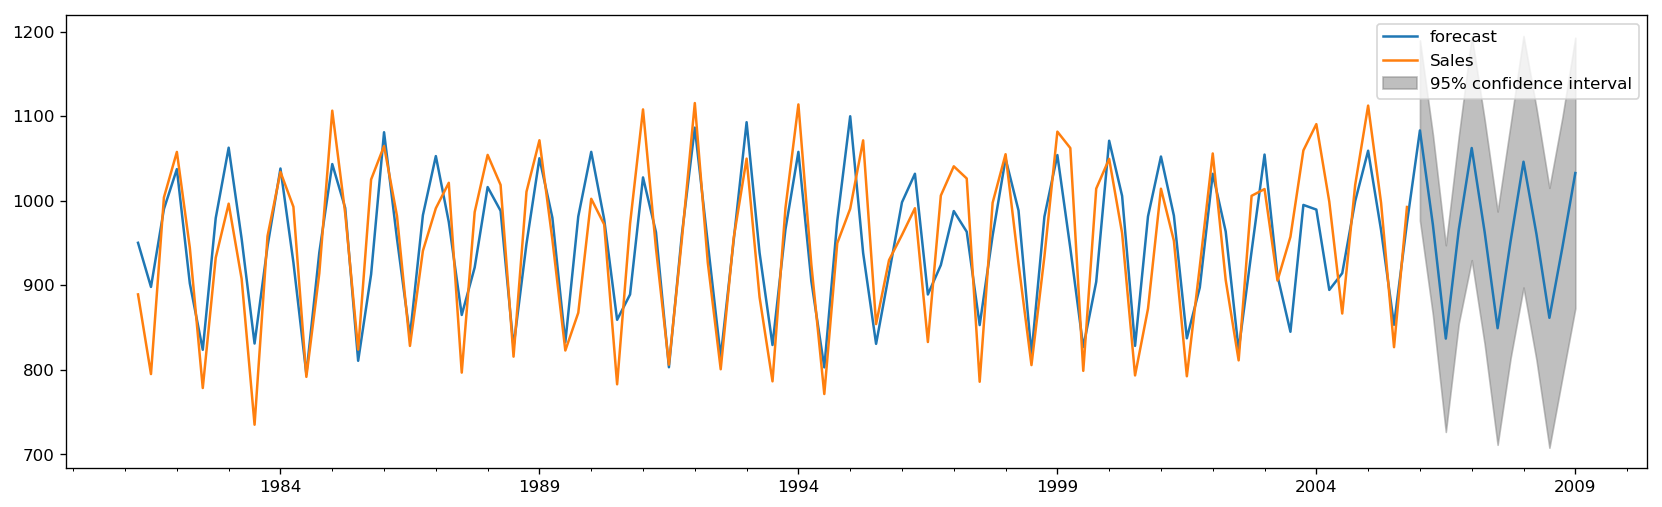

In [336]:
model_fit.plot_predict(1,112)
x=model_fit.forecast(steps=112)

### ARIMA (4,0,2)

In [339]:
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(ts1, order=(4,0,2))
model_fit1 = model1.fit(disp=0)
print(model_fit1.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  100
Model:                     ARMA(4, 2)   Log Likelihood                -535.116
Method:                       css-mle   S.D. of innovations             48.384
Date:                Thu, 05 Sep 2019   AIC                           1086.233
Time:                        23:12:26   BIC                           1107.074
Sample:                    03-01-1981   HQIC                          1094.668
                         - 12-01-2005                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         951.1108      5.964    159.466      0.000     939.421     962.801
ar.L1.Sales     0.0069      0.125      0.055      0.956      -0.238       0.251
ar.L2.Sales    -0.8350      0.002   -455.777    

In [341]:
fc, se, conf = model_fit1.forecast(15, alpha=0.05)

### Plot Prediksi dengan Data Aktual

Plotting AR model


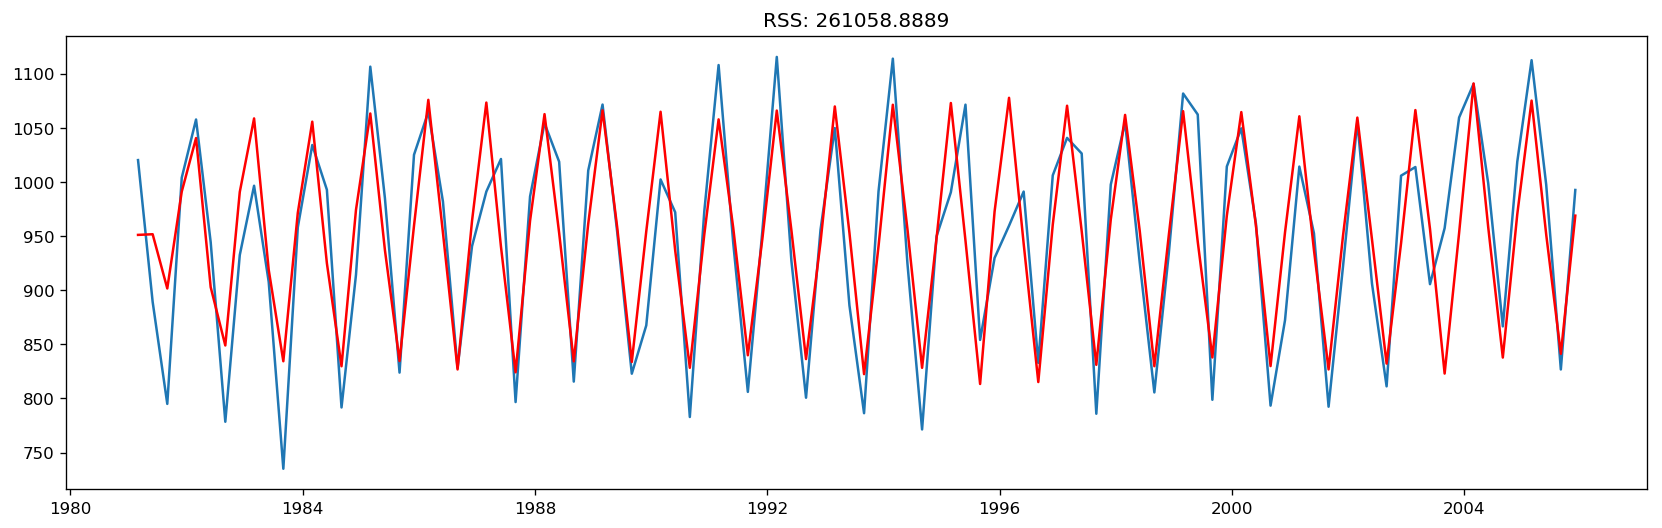

In [343]:
plt.plot(ts1)
plt.plot(model_fit1.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_fit1.fittedvalues-ts1['Sales'])**2))
print('Plotting AR model')

Antara data prediksi dengan data aktual memiliki pola yang sama.

### Evaluasi Hasil Prediksi

In [354]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax        
    return({'MAPE':mape, 
            'ME'  :me, 
            'MAE' :mae, 
            'MPE' :mpe, 
            'RMSE':rmse, 
            'CORR':corr, 
            'MINMAX':minmax})
forecast_accuracy(model_fit1.predict(),ts1['Sales'])

{'CORR': 0.8527848871378736,
 'MAE': 41.75261508980218,
 'MAPE': 0.044482731746039936,
 'ME': 1.8350757469344785,
 'MINMAX': 0.042924584433740476,
 'MPE': 0.005086336324352482,
 'RMSE': 51.093922227620666}

### Hasil Prediksi

In [352]:
hasil=model_fit1.fittedvalues
hasil.head()

1981-03-01     951.110830
1981-06-01     951.716800
1981-09-01     901.624120
1981-12-01     991.081146
1982-03-01    1040.547105
dtype: float64

### Plot Data Training dan Data Testing

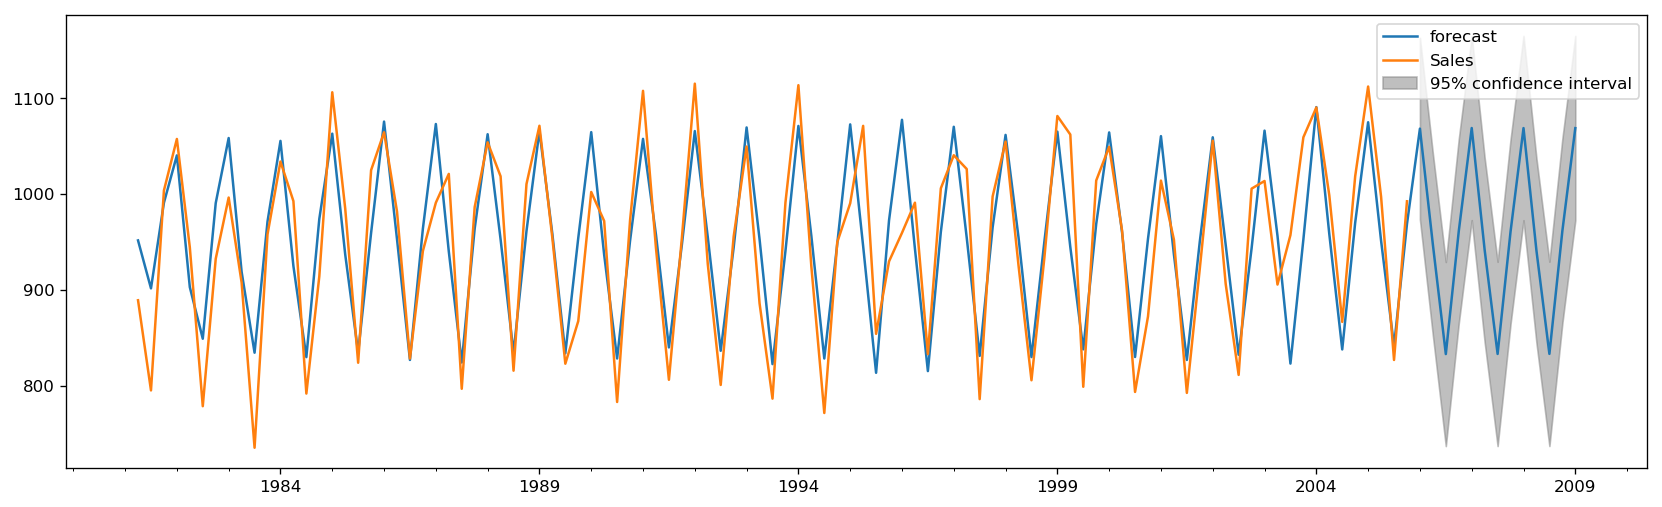

In [349]:
model_fit1.plot_predict(1,112)
x=model_fit1.forecast(steps=112)

### SARIMA

In [311]:
import warnings
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

train = ts1['1981-03-01':'2000-12-01']
test = ts1['2001-03-01':'2005-12-01']

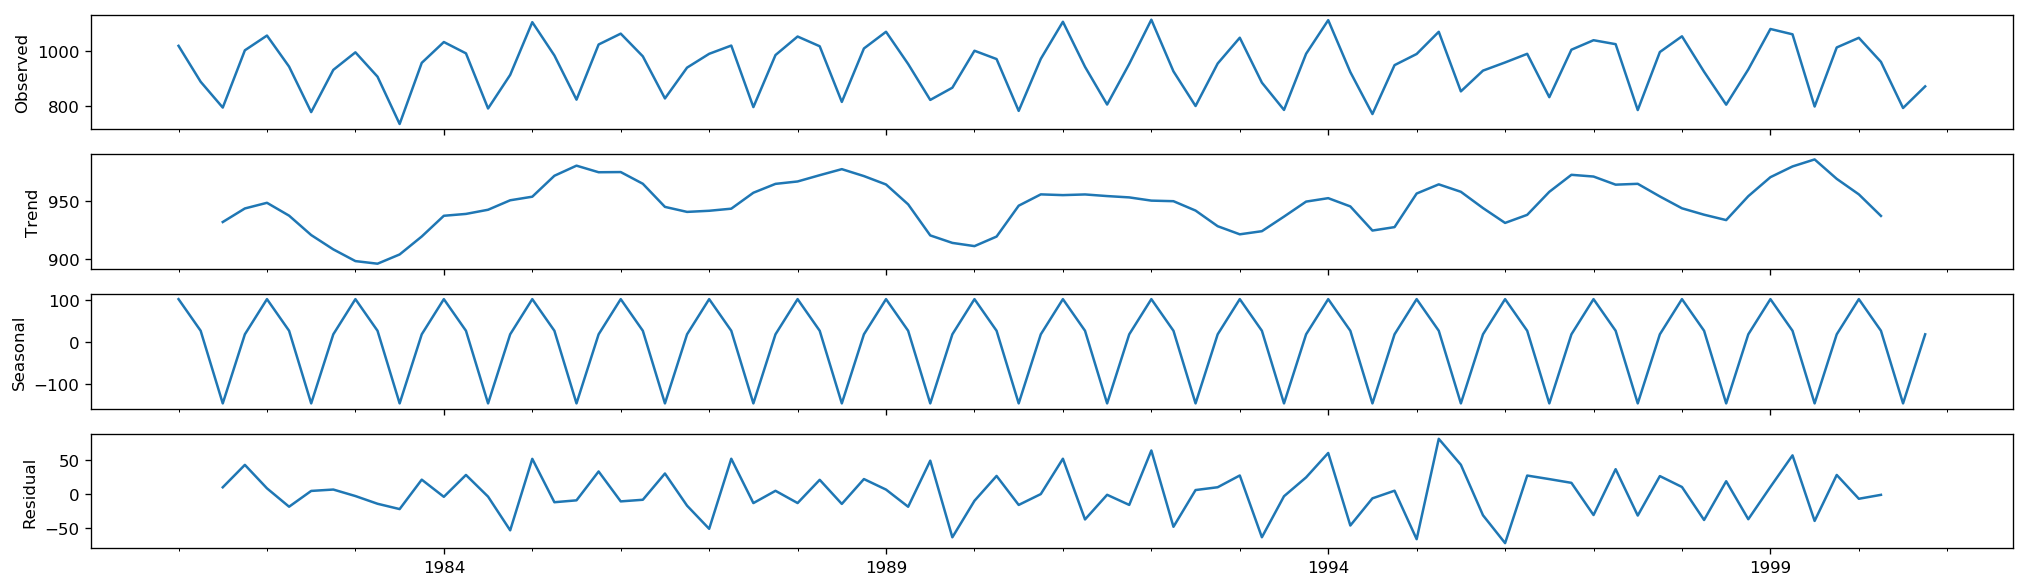

In [327]:
decomposition = sm.tsa.seasonal_decompose(train, model='add')
fig = decomposition.plot()
plt.show()

Secara visual diketahui bahwa terdapat **pola seasonal** pada data training sehingga prediksi akan dilakukan dengan menggunakan SARIMA

In [321]:
mod = sm.tsa.statespace.SARIMAX(endog=train.values,
                                order=(4, 0, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [322]:
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0476      0.135     -0.353      0.724      -0.312       0.217
ar.L2         -0.0334      0.198     -0.169      0.866      -0.421       0.354
ar.L3         -0.1742      0.174     -1.000      0.317      -0.516       0.167
ar.L4          0.0177      0.160      0.111      0.912      -0.295       0.331
ma.S.L12      -1.0000      0.208     -4.800      0.000      -1.408      -0.592
sigma2      1601.2692      0.000   1.23e+07      0.000    1601.269    1601.269


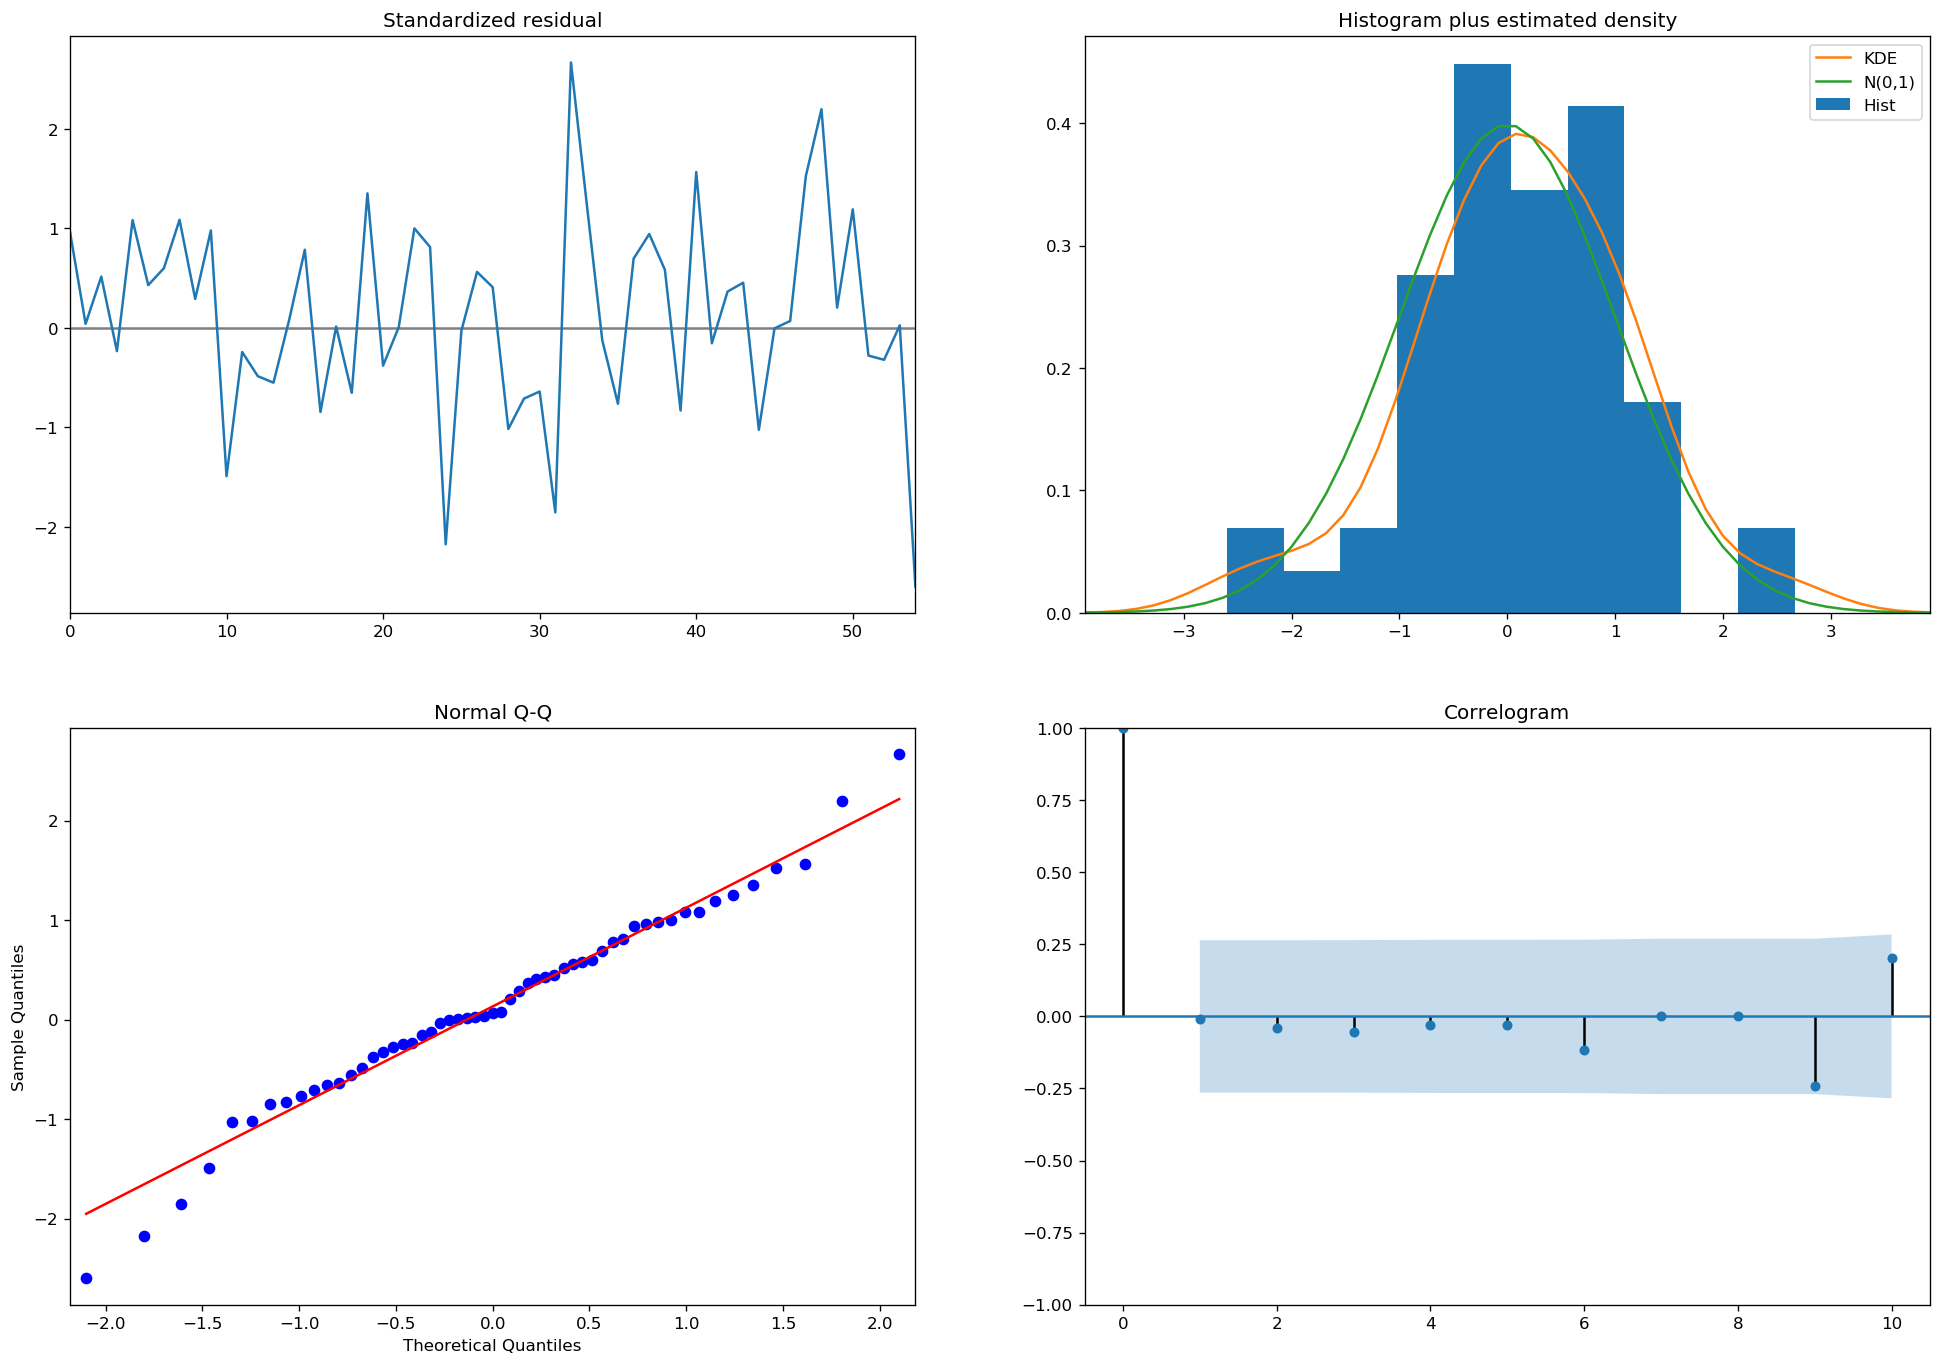

In [323]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [325]:
def plot_forecasts(train, test, forecast):
    plt.figure(figsize=(15,10))
    plt.plot(train["1981-03-01":])
    plt.plot(test.index, forecast[:48])
    plt.plot(test)
    plt.legend(["Train","Forecast","Actual"], fontsize = 'x-large', loc = 1)

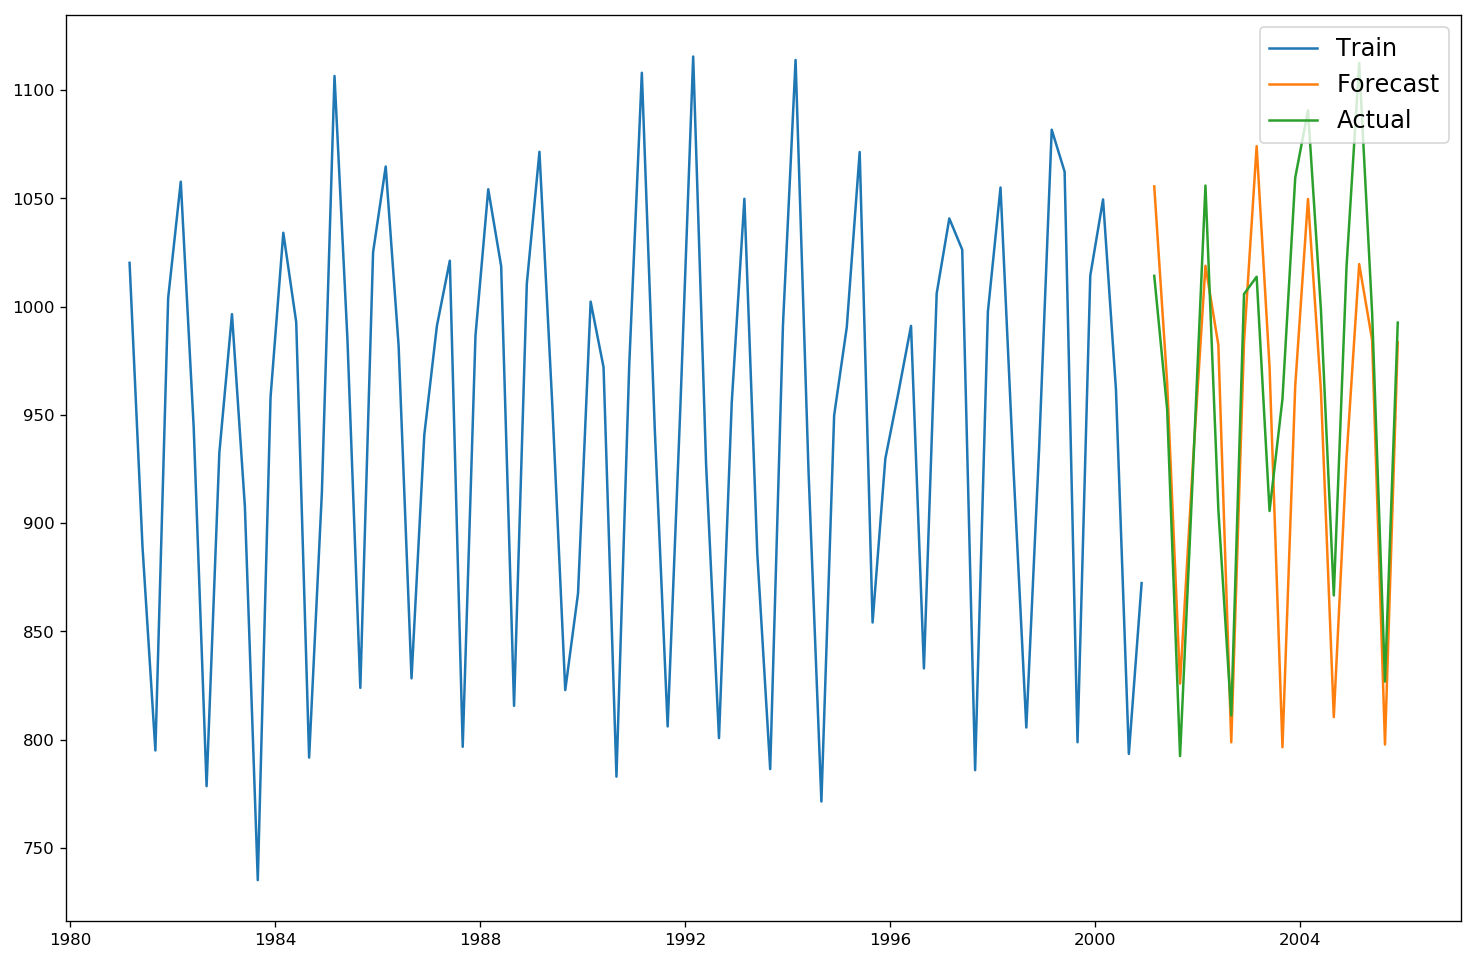

In [351]:
plot_forecasts(train, test, forecast)

### Evaluasi Hasil Prediksi

In [329]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax        
    return({'MAPE':mape, 
            'ME'  :me, 
            'MAE' :mae, 
            'MPE' :mpe, 
            'RMSE':rmse, 
            'CORR':corr, 
            'MINMAX':minmax})

In [335]:
forecast_accuracy(results.predict(),ts1['Sales'][:80])

{'CORR': 0.29431636343687895,
 'MAE': 186.01460177004705,
 'MAPE': 0.20095765366085,
 'ME': -163.4529017436543,
 'MINMAX': 0.20017679114522424,
 'MPE': -0.17632194240876353,
 'RMSE': 392.0671640961595}

#### HASIL AKHIR PREDIKSI :

Setelah dilakukan perhitungan dengan : <br>
    * ARIMA (4,0,0)
    * ARIMA (4,0,2)
    * SARIMA
Didapatkan nilai MAPE dari masing-masing model adalah sebagai berikut :
    * ARIMA (4,0,0) : 4,78%
    * ARIMA (4,0,2) : 4,44%
    * SARIMA : 20,1%
        
Sehingga model prediksi yang digunakan adalah **ARIMA (4,0,2)**